# Explore models

This notebook displays the characteristics *hwhm*, *eisf* and *qisf* of a selected model of the QENS library.

<a id='Table of Contents'></a><h3>Table of Contents</h3>
- <a href='#imports'>Load packages</a>  
- <a href='#choice_model'>Choice of model</a>  
- <a href='#display_model'>Plot characteristics of selected model</a>

(<a href='#Table of Contents'>Top</a>)<a id='imports'></a><h2>Load packages</h2>

In [10]:
from __future__ import print_function

import sys
import numpy as np
import matplotlib.pyplot as plt

import QENSmodels

# for interactive plot
import ipywidgets

In [11]:
# Vector of Q values
q = np.arange(0.0, 10, 0.1)

(<a href='#Table of Contents'>Top</a>)<a id='choice_model'></a><h2>Choice of model</h2>

In [12]:
# Choose model to use
model = ipywidgets.RadioButtons(
    options=['BrownianTranslationalDiffusion', 'JumpTranslationalDiffusion', 'IsotropicRotationalDiffusion'],
    description='Model:',
    disabled=False
)

display(model)

RadioButtons(description=u'Model:', options=('BrownianTranslationalDiffusion', 'JumpTranslationalDiffusion', 'IsotropicRotationalDiffusion'), value='BrownianTranslationalDiffusion')

(<a href='#Table of Contents'>Top</a>)<a id='display_model'></a><h2>Plot characteristics of selected model</h2>

Depending on the selected model, different inputs will be requested.

Jump Translational Diffusion model:
Value of self-diffusion coefficient (in A^2*meV)? 1
Residence time between jumps (in meV^-1)? 2


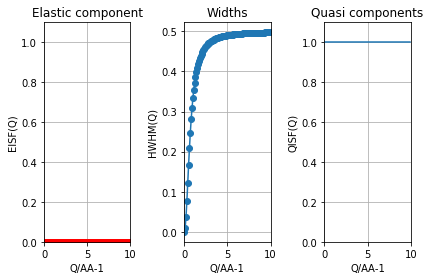

In [19]:
if model.value == 'BrownianTranslationalDiffusion':
    print ("Brownian Translational Diffusion model:")
    D = float(raw_input("Value of self-diffusion coefficient (in A^2*meV)? "))
    hwhm, eisf, qisf = QENSmodels.hwhmBrownianTranslationalDiffusion(q, D)

elif model.value == 'JumpTranslationalDiffusion':
    print ("Jump Translational Diffusion model:")
    D = float(raw_input("Value of self-diffusion coefficient (in A^2*meV)? "))
    resTime = float(raw_input("Residence time between jumps (in meV^-1)? "))
    hwhm, eisf, qisf = QENSmodels.hwhmJumpTranslationalDiffusion(q, D, resTime)

elif model.value == 'IsotropicRotationalDiffusion':
    print ("Isotropic Rotational Diffusion model:")
    R = float(raw_input("Radius of sphere? "))
    DR = float(raw_input("Value of rotational diffusion coefficient (in meV)? "))
    hwhm, eisf, qisf = QENSmodels.hwhmIsotropicRotationalDiffusion(q, R, DR)

fig = plt.figure(1)

ax1 = fig.add_subplot(131)
ax1.plot(q, eisf, 'ro', linestyle='--')
ax1.grid(True)
ax1.set_xlim((0,10))
ax1.set_ylim((0,1.1))
ax1.set_xlabel('Q/AA-1')
ax1.set_ylabel('EISF(Q)')
ax1.set_title('Elastic component')

ax2 = fig.add_subplot(132)
ax2.plot(q, hwhm, linestyle='-', marker='o')
ax2.grid(True)
ax2.set_xlim((0,10))
ax2.set_xlabel('Q/AA-1')
ax2.set_ylabel('HWHM(Q)')
ax2.set_title('Widths')

ax3 = fig.add_subplot(133)
ax3.plot(q, qisf, linestyle='-')
ax3.grid(True)
ax3.set_xlim((0,10))
ax3.set_ylim((0,1.1))
ax3.set_xlabel('Q/AA-1')
ax3.set_ylabel('QISF(Q)')
ax3.set_title('Quasi components')

plt.tight_layout()

plt.show()   